In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Carregar o banco de dados


Subindo o dataset


In [6]:
df_btc = pd.read_csv('/home/gabriellemitoso/modulo7-engcomp/ponderada-crypto/src/data/dados-puros/bitcoin_daily_data.csv')
df_ethereum = pd.read_csv('/home/gabriellemitoso/modulo7-engcomp/ponderada-crypto/src/data/dados-puros/ethereum_daily_data.csv')

Obter infos sobre o csv


In [7]:
df_btc.shape

(365, 11)

In [8]:
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          365 non-null    object 
 1   open_price    365 non-null    float64
 2   close_price   365 non-null    float64
 3   min_price     365 non-null    float64
 4   max_price     365 non-null    float64
 5   total_volume  365 non-null    float64
 6   7_day_MA      359 non-null    float64
 7   daily_return  364 non-null    float64
 8   volatility    358 non-null    float64
 9   VWAP          0 non-null      float64
 10  RSI           352 non-null    float64
dtypes: float64(10), object(1)
memory usage: 31.5+ KB


In [9]:
df_btc.columns

Index(['date', 'open_price', 'close_price', 'min_price', 'max_price',
       'total_volume', '7_day_MA', 'daily_return', 'volatility', 'VWAP',
       'RSI'],
      dtype='object')

date: Data do registro dos preços e volumes.

open_price: Preço de abertura do ativo nesse dia, ou seja, o preço ao qual o ativo foi negociado no início do pregão.

close_price: Preço de fechamento do ativo nesse dia, ou seja, o preço da última negociação do ativo ao fim do pregão.

min_price: Menor preço registrado durante o dia.

max_price: Maior preço registrado durante o dia.

total_volume: Volume total de negociação do ativo, representando a quantidade de ações ou contratos negociados no dia.

7_day_MA (Média Móvel de 7 dias): Média móvel do preço de fechamento nos últimos 7 dias, usada para suavizar flutuações diárias e identificar tendências.

daily_return (Retorno Diário): Retorno percentual diário do ativo, calculado pela fórmula. Indica a variação percentual do preço do ativo de um dia para o outro.

volatility: Medida da variação dos preços do ativo ao longo do tempo, representando o risco associado ao ativo. É calculada usando a variação percentual diária do preço.

VWAP (Volume Weighted Average Price): Preço médio ponderado pelo volume, que dá uma média dos preços de negociação ao longo do dia, ponderada pelo volume negociado em cada preço.

RSI (Relative Strength Index): Indicador técnico que mede a força do ativo em termos de compras e vendas, oscilando entre 0 e 100. Um valor acima de 70 indica que o ativo pode estar sobrecomprado (overbought), enquanto abaixo de 30 indica que pode estar sobrevendido (oversold).

In [10]:
# Ter informacoes de quais dados sao nulos e sua quantidade para saber quatos irao ser descartados
df_btc.isna().sum()

date              0
open_price        0
close_price       0
min_price         0
max_price         0
total_volume      0
7_day_MA          6
daily_return      1
volatility        7
VWAP            365
RSI              13
dtype: int64

In [11]:
# Renomeando as colunas
df_btc = df_btc.rename(columns={
    'date': 'Data', 
    'open_price': 'Abertura', 
    'close_price': 'Ultimo', 
    'min_price': 'Minima', 
    'max_price': 'Maxima', 
    'total_volume': 'Vol', 
    'daily_return': 'Var', 
    'volatility': 'Volatilidade'
})

# Removendo a coluna 'VWAP'
df_btc = df.drop(columns=['VWAP'])
df_btc = df.drop(columns=['RSI'])

# Exibindo o DataFrame atualizado
print(df_btc)


NameError: name 'df' is not defined

In [46]:
df_btc['7_day_MA'] = df_btc['Ultimo'].rolling(window=7).mean()
df_btc['Var'] = df_btc['Var'].fillna(0)

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_btc[['Abertura', 'Ultimo', 'Vol', 'Maxima', 'Minima', 'Volatilidade', 'Vol']] = scaler.fit_transform(df_btc[['Abertura', 'Ultimo', 'Vol', 'Maxima', 'Minima', 'Volatilidade', 'Vol']])

df_btc

,Data,Abertura,Ultimo,Minima,Maxima,Vol,7_day_MA,Var,Volatilidade,VWAP
0,2023-09-25,0.000955,0.000955,0.000955,0.000955,0.014674,NaN,0.000000,NaN,NaN
1,2023-09-26,0.002002,0.002002,0.002002,0.002002,0.056074,NaN,0.001869,NaN,NaN
2,2023-09-27,0.000000,0.000000,0.000000,0.000000,0.036990,NaN,-0.003570,NaN,NaN
3,2023-09-28,0.003100,0.003100,0.003100,0.003100,0.064048,NaN,0.005548,NaN,NaN
4,2023-09-29,0.017151,0.017151,0.017151,0.017151,0.097121,NaN,0.025004,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
360,2024-09-19,0.751405,0.751405,0.751405,0.751405,0.304284,59702.035381,0.018625,0.282070,NaN
361,2024-09-20,0.783950,0.783950,0.783950,0.783950,0.317481,60396.260822,0.024839,0.292863,NaN
362,2024-09-21,0.787398,0.787398,0.787398,0.787398,0.261935,60754.488975,0.002568,0.223266,NaN
363,2024-09-22,0.793266,0.793266,0.793266,0.793266,0.064470,61240.217968,0.004359,0.203286,NaN


In [48]:
correlation_matrix = df_btc[['Var', 'Volatilidade']].corr()
print(correlation_matrix)


                   Var  Volatilidade
Var           1.000000      0.085728
Volatilidade  0.085728      1.000000


In [49]:
# Transformação para float dos dados 
for i in df_btc.columns:
    try:
        if(i != 'Data'):
            df_btc[f'{i}'] = df[f'{i}'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)
    except:
        pass
df_btc

,Data,Abertura,Ultimo,Minima,Maxima,Vol,7_day_MA,Var,Volatilidade,VWAP
0,2023-09-25,0.000955,0.000955,0.000955,0.000955,0.014674,NaN,0.000000,NaN,NaN
1,2023-09-26,0.002002,0.002002,0.002002,0.002002,0.056074,NaN,0.001869,NaN,NaN
2,2023-09-27,0.000000,0.000000,0.000000,0.000000,0.036990,NaN,-0.003570,NaN,NaN
3,2023-09-28,0.003100,0.003100,0.003100,0.003100,0.064048,NaN,0.005548,NaN,NaN
4,2023-09-29,0.017151,0.017151,0.017151,0.017151,0.097121,NaN,0.025004,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
360,2024-09-19,0.751405,0.751405,0.751405,0.751405,0.304284,59702.035381,0.018625,0.282070,NaN
361,2024-09-20,0.783950,0.783950,0.783950,0.783950,0.317481,60396.260822,0.024839,0.292863,NaN
362,2024-09-21,0.787398,0.787398,0.787398,0.787398,0.261935,60754.488975,0.002568,0.223266,NaN
363,2024-09-22,0.793266,0.793266,0.793266,0.793266,0.064470,61240.217968,0.004359,0.203286,NaN


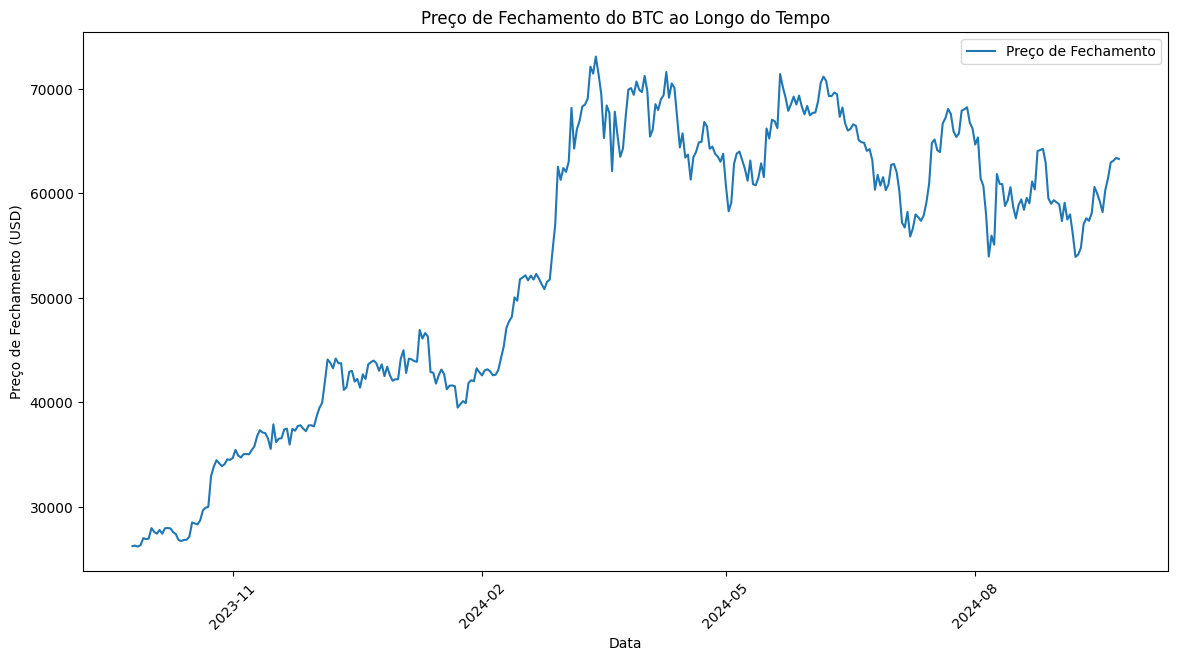

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Converter a coluna 'Data' para o tipo datetime
df_btc['Data'] = pd.to_datetime(df_btc['Data'])

plt.figure(figsize=(14, 7))
plt.plot(df_btc['Data'], df_btc['Ultimo'], label='Preço de Fechamento')

# Rotacionar os rótulos das datas
plt.xticks(rotation=45)

# Definir o formato da data para exibição
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  

plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.title('Preço de Fechamento do BTC ao Longo do Tempo')
plt.legend()
plt.show()


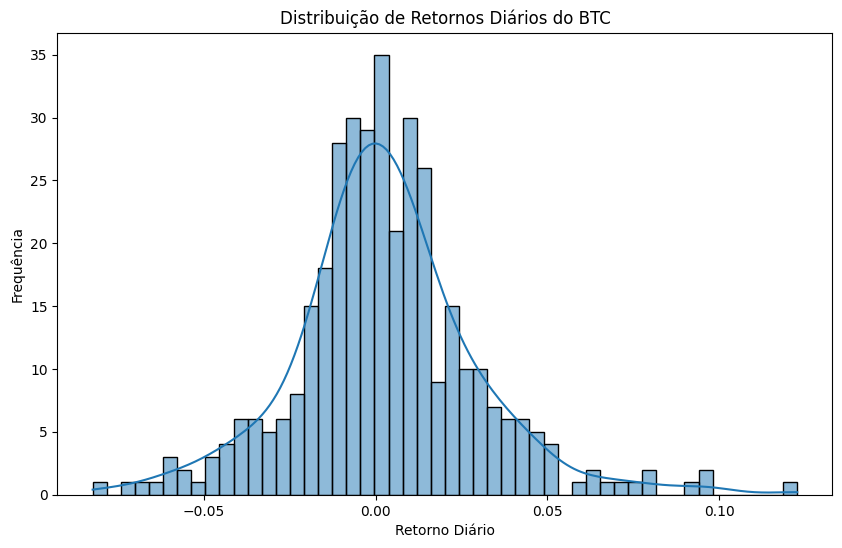

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_btc['Retorno_Diario'] = df_btc['Ultimo'].pct_change()

plt.figure(figsize=(10, 6))
sns.histplot(df_btc['Retorno_Diario'].dropna(), bins=50, kde=True)

plt.title('Distribuição de Retornos Diários do BTC')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.show()


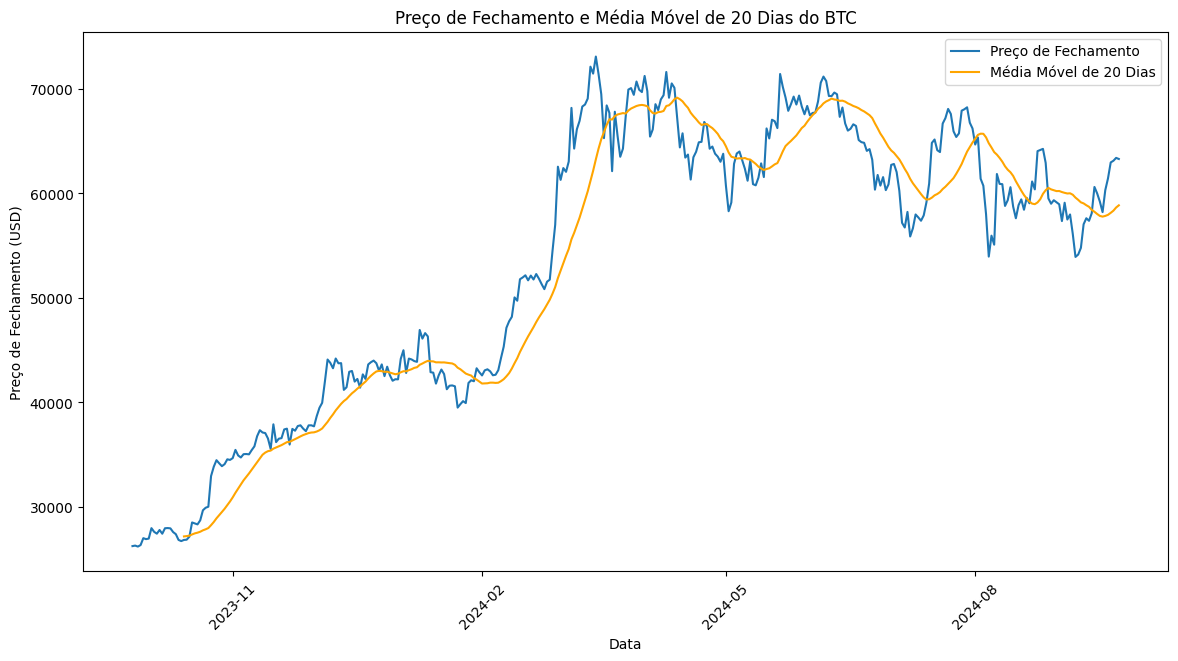

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Converter a coluna 'Data' para o tipo datetime
df_btc['Data'] = pd.to_datetime(df_btc['Data'])

# Calculando a Média Móvel de 20 dias (alterado 'Close' para 'Ultimo')
df_btc['SMA_20'] = df_btc['Ultimo'].rolling(window=20).mean()

# Plotando as Médias Móveis
plt.figure(figsize=(14, 7))
plt.plot(df_btc['Data'], df_btc['Ultimo'], label='Preço de Fechamento')
plt.plot(df_btc['Data'], df_btc['SMA_20'], label='Média Móvel de 20 Dias', color='orange')

# Rotacionar os rótulos das datas
plt.xticks(rotation=45)

# Definir o formato da data para exibição
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  

plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.title('Preço de Fechamento e Média Móvel de 20 Dias do BTC')
plt.legend()
plt.show()


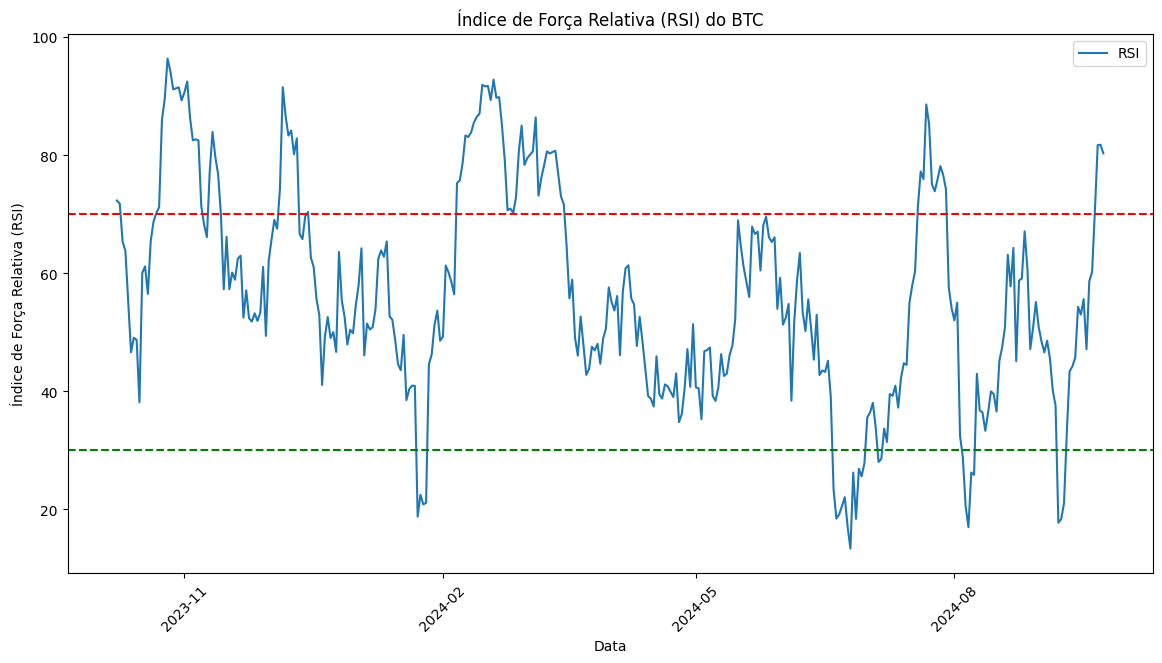

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Converter a coluna 'Data' para o tipo datetime
df_btc['Data'] = pd.to_datetime(df_btc['Data'])

# Função para calcular o RSI (alterado 'Close' para 'Ultimo')
def calculate_rsi(data, window=14):
    delta = data['Ultimo'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df_btc['RSI'] = calculate_rsi(df_btc)

plt.figure(figsize=(14, 7))
plt.plot(df_btc['Data'], df_btc['RSI'], label='RSI')
plt.axhline(70, color='red', linestyle='--')  
plt.axhline(30, color='green', linestyle='--') 

plt.xticks(rotation=45)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  

plt.xlabel('Data')
plt.ylabel('Índice de Força Relativa (RSI)')
plt.title('Índice de Força Relativa (RSI) do BTC')
plt.legend()
plt.show()


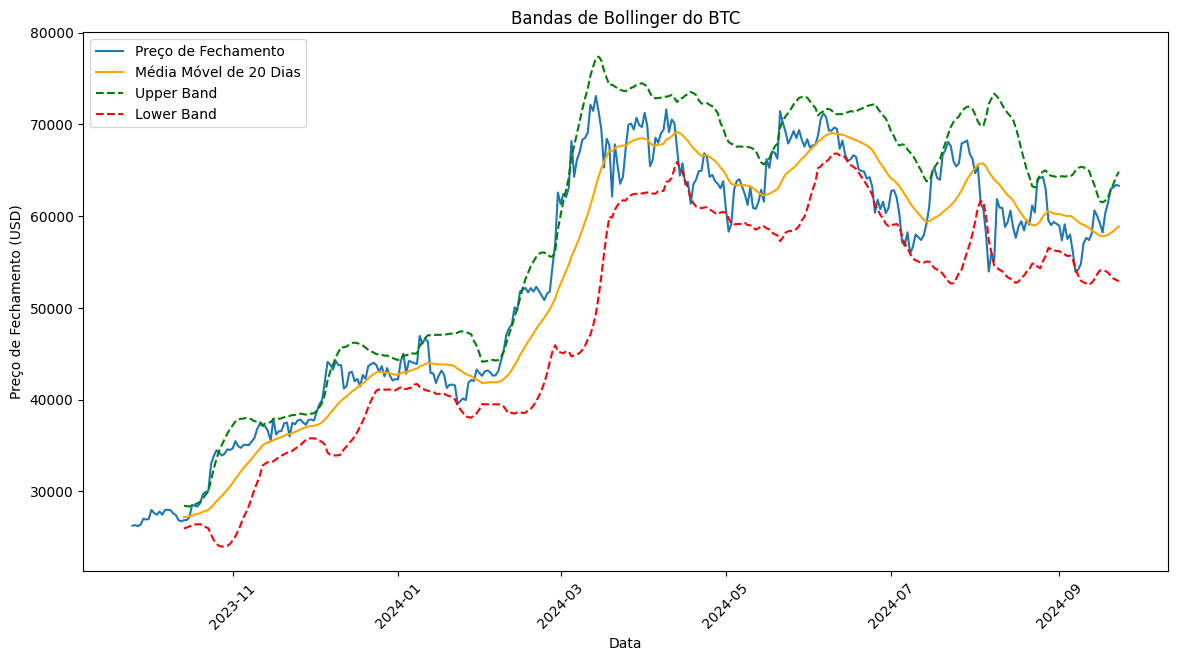

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculando as Bandas de Bollinger para BTC
df_btc['SMA_20'] = df_btc['Ultimo'].rolling(window=20).mean()
df_btc['Upper_Band'] = df_btc['SMA_20'] + (df_btc['Ultimo'].rolling(window=20).std() * 2)
df_btc['Lower_Band'] = df_btc['SMA_20'] - (df_btc['Ultimo'].rolling(window=20).std() * 2)

# Plotando as Bandas de Bollinger para BTC
plt.figure(figsize=(14, 7))
plt.plot(df_btc['Data'], df_btc['Ultimo'], label='Preço de Fechamento')
plt.plot(df_btc['Data'], df_btc['SMA_20'], label='Média Móvel de 20 Dias', color='orange')
plt.plot(df_btc['Data'], df_btc['Upper_Band'], label='Upper Band', color='green', linestyle='--')
plt.plot(df_btc['Data'], df_btc['Lower_Band'], label='Lower Band', color='red', linestyle='--')

plt.xticks(rotation=45)
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.title('Bandas de Bollinger do BTC')
plt.legend()
plt.show()
